In [74]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('/content/gdrive/MyDrive/Insurance cross sell.csv')

In [77]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [78]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Vehicle_Damage'] = label.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = label.fit_transform(df['Vehicle_Age'])

0    334399
1     46710
Name: Response, dtype: int64

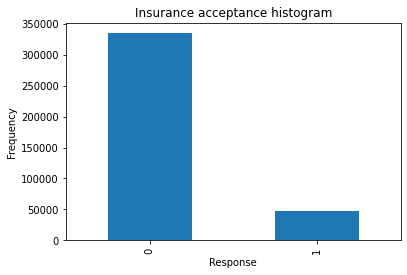

In [79]:
import matplotlib.pyplot as plt
df.value_counts(df['Response']).plot.bar()
plt.title('Insurance acceptance histogram')
plt.xlabel('Response')
plt.ylabel('Frequency')
df['Response'].value_counts()

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
X = df.iloc[: , :-1].values
Y = df.iloc[: , -1].values

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [83]:
print('Shape of X: {}'.format(X.shape))
print('Shape of Y: {}'.format(Y.shape))

Shape of X: (381109, 11)
Shape of Y: (381109,)


In [84]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (342998, 11)
Number transactions y_train dataset:  (342998,)
Number transactions X_test dataset:  (38111, 11)
Number transactions y_test dataset:  (38111,)


In [85]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 41927
Before OverSampling, counts of label '0': 301071 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (602142, 11)
After OverSampling, the shape of train_Y: (602142,) 

After OverSampling, counts of label '1': 301071
After OverSampling, counts of label '0': 301071
